In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import os
import pwlf
from surface_dynamics.all import *
from Library import *
from Library import Section
import math
from time import time
import copy
from scipy import integrate
import sympy as sym
from sympy import Symbol, solve, lambdify
import traceback
import dill
import sys
import unittest
from surface_dynamics.all import Origami
from utils import load_arrays_from_file  # testing
import re

from sage.all import *
import numpy as np
from fractions import Fraction as frac
M = mathematica
from IPython.display import display, Math

import sympy as sp
from sympy.parsing.sympy_parser import parse_expr

from mathematica import *
from integration_functions import *

t = sp.Symbol('t')

SyntaxError: EOL while scanning string literal (mathematica.py, line 214)

In [2]:
base_dir = "results/7 - 20"  # Or wherever your top-level directory is
eqs_dict = {}

for folder in os.listdir(base_dir):
    if folder.startswith("cusp -"):
        folder_path = os.path.join(base_dir, folder)
        print(folder_path)
        
        for file in os.listdir(folder_path):
            if file.startswith("equation_") and file.endswith(".dill"):
                file_path = os.path.join(folder_path, file)
                # Load the equation
                with open(file_path, "rb") as f:
                    eq = dill.load(f)

                if eq not in eqs_dict:
                    eqs_dict[eq] = 1
                else:
                    eqs_dict[eq] += 1

print()
for key in eqs_dict.keys():
    print(key)
    print()
    print(eqs_dict[key])
    print()
    print("---------------------------------------------------------------------------------------------------------------------------------------------")

results/7 - 20/cusp - 0
results/7 - 20/cusp - 1
results/7 - 20/cusp - 2
results/7 - 20/cusp - 3
results/7 - 20/cusp - 4
results/7 - 20/cusp - 5
results/7 - 20/cusp - 6
results/7 - 20/cusp - 7
results/7 - 20/cusp - 8
results/7 - 20/cusp - 9

Piecewise((0, (t >= 0) & (t < 2)), (-log(2/t)/t**2, (t >= 2) & (t < 4)), ((-log(2/t) + log(1 - sqrt(t*(t - 4))/t))/t**2, (t >= 4) & (Infinity > t)))

6

---------------------------------------------------------------------------------------------------------------------------------------------
Piecewise((0, (t >= 0) & (t < 2)), (-log(2/t)/t**2, (t >= 2) & (t < 8)), (-(log(2/t) + 2*atanh(sqrt((t - 8)/t)))/t**2, (t >= 8) & (Infinity > t)))

2

---------------------------------------------------------------------------------------------------------------------------------------------
Piecewise((0, (t >= 0) & (t < 2)), (-log(2/t)/t**2, (t >= 2) & (t < 8)), ((-log(2/t) + log(1 - sqrt(t*(t - 8))/t) - 2*atanh(sqrt((t - 8)/t)))/t**2, (t >= 8) & (t < 9)), ((

In [2]:
with open(os.path.join("results", f"{7} - {20}", f"final_scaled_eq.dill"), "rb") as f:
    scaled = dill.load(f)

with open(os.path.join("results", f"{7} - {20}", f"final_eq.dill"), "rb") as f:
    original = dill.load(f)

In [3]:
scaled

Piecewise((0, (t >= 0) & (t < 1)), (-log(1/t)/t**2, (t >= 1) & (t < 2)), (-log(1/t)/t**2 - 23*log(2/t)/(36*t**2), (t >= 2) & (t < 3)), (-log(1/t)/t**2 - 23*log(2/t)/(36*t**2) - 7*log(3/t)/(36*t**2), (t >= 3) & (t < 4)), (-5*(log(1/t) + 2*atanh(sqrt((t - 4)/t)))/(6*t**2) + (-log(2/t) + log(1 - sqrt(t*(t - 4))/t))/(6*t**2) + (-t**(3/2)/sqrt(t - 4) + sqrt(t)*sqrt(t - 4) - 8*log(sqrt((t - 4)/t) + 1) + 4 + log(256) + 16/(t*sqrt((t - 4)/t) + t - 4))/(48*t**2) - log(1/t)/(6*t**2) - 11*log(2/t)/(36*t**2) - 7*log(3/t)/(36*t**2) - log(4/t)/(18*t**2), (t >= 4) & (t < 5)), (-5*(log(1/t) + 2*atanh(sqrt((t - 4)/t)))/(6*t**2) + (-log(2/t) + log(1 - sqrt(t*(t - 4))/t))/(6*t**2) + (-t**(3/2)/sqrt(t - 4) + sqrt(t)*sqrt(t - 4) - 8*log(sqrt((t - 4)/t) + 1) + 4 + log(256) + 16/(t*sqrt((t - 4)/t) + t - 4))/(48*t**2) - log(1/t)/(6*t**2) - 11*log(2/t)/(36*t**2) - 7*log(3/t)/(36*t**2) - log(4/t)/(18*t**2) - log(5/t)/(18*t**2), (t >= 5) & (t < 16/3)), (-5*(log(1/t) + 2*atanh(sqrt((t - 4)/t)))/(6*t**2) + (-log(2

In [4]:
original

Piecewise((0, (t >= 0) & (t < 1)), (-36*log(1/t)/t**2, (t >= 1) & (t < 2)), (-36*log(1/t)/t**2 - 23*log(2/t)/t**2, (t >= 2) & (t < 3)), (-36*log(1/t)/t**2 - 23*log(2/t)/t**2 - 7*log(3/t)/t**2, (t >= 3) & (t < 4)), (-30*(log(1/t) + 2*atanh(sqrt((t - 4)/t)))/t**2 + 6*(-log(2/t) + log(1 - sqrt(t*(t - 4))/t))/t**2 + 3*(-t**(3/2)/sqrt(t - 4) + sqrt(t)*sqrt(t - 4) - 8*log(sqrt((t - 4)/t) + 1) + 4 + log(256) + 16/(t*sqrt((t - 4)/t) + t - 4))/(4*t**2) - 6*log(1/t)/t**2 - 11*log(2/t)/t**2 - 7*log(3/t)/t**2 - 2*log(4/t)/t**2, (t >= 4) & (t < 5)), (-30*(log(1/t) + 2*atanh(sqrt((t - 4)/t)))/t**2 + 6*(-log(2/t) + log(1 - sqrt(t*(t - 4))/t))/t**2 + 3*(-t**(3/2)/sqrt(t - 4) + sqrt(t)*sqrt(t - 4) - 8*log(sqrt((t - 4)/t) + 1) + 4 + log(256) + 16/(t*sqrt((t - 4)/t) + t - 4))/(4*t**2) - 6*log(1/t)/t**2 - 11*log(2/t)/t**2 - 7*log(3/t)/t**2 - 2*log(4/t)/t**2 - 2*log(5/t)/t**2, (t >= 5) & (t < 16/3)), (-30*(log(1/t) + 2*atanh(sqrt((t - 4)/t)))/t**2 + 6*(-log(2/t) + log(1 - sqrt(t*(t - 4))/t))/t**2 - 6*(log(

section 0
['x0 = 3', 'y0 = 2', 'top = 1/2 - 3*x/2', 'bottom1 = 1/2 - 7*x/4', 'left = 0']
timeEnter:          2
timeLeftEnd: None
timeBottom1:          4
timePoint1:          4
timeLeftEndA: None
timePoint1A:          4
f$011$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 4},{f$011$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '4'], ['4', 'Infinity']]
cs for graph: [['0', '2'], ['2', '4'], ['4', 20]]


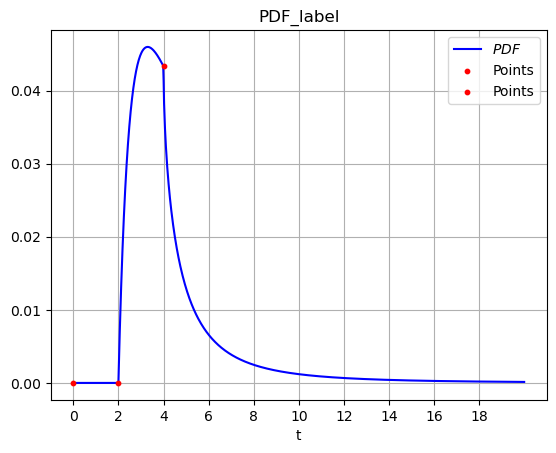

['x0 = 7/2', 'y0 = 2', 'top = 1/2 - 7*x/4', 'bottom1 = 1/2 - 2*x', 'left = 0']
timeEnter:          2
timeLeftEnd: None
timeBottom1:          4
timePoint1:          4
timeLeftEndA: None
timePoint1A:          4
f$011$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 4},{f$011$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '4'], ['4', 'Infinity']]
cs for graph: [['0', '2'], ['2', '4'], ['4', 20]]


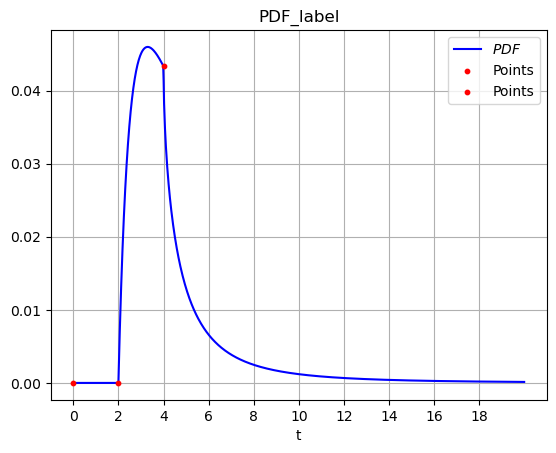

['x0 = 2', 'y0 = 2', 'top = 1/2 - x', 'bottom1 = 1/2 - 3*x/2', 'left = 0']
timeEnter:           2
timeLeftEnd: None
timeBottom1:           8
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 8},{f$010$000$000, 8 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '8'], ['8', 'Infinity']]
cs for graph: [['0', '2'], ['2', '8'], ['8', 20]]


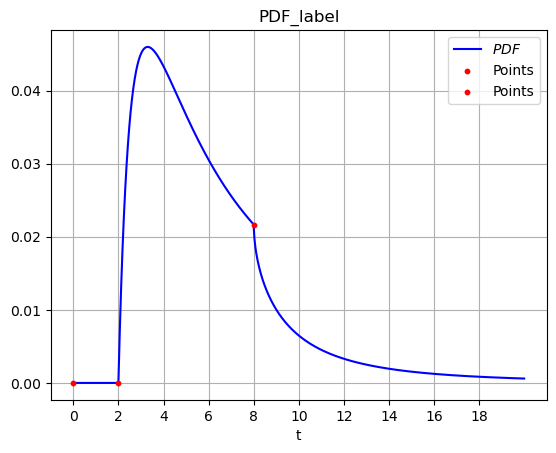

['x0 = 4', 'y0 = 2', 'top = 1/2 - 2*x', 'bottom1 = 1/2 - 9*x/4', 'left = 0']
timeEnter:           2
timeLeftEnd: None
timeBottom1:           4
timePoint1:           4
timeLeftEndA: None
timePoint1A:           4
f$011$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 4},{f$011$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '4'], ['4', 'Infinity']]
cs for graph: [['0', '2'], ['2', '4'], ['4', 20]]


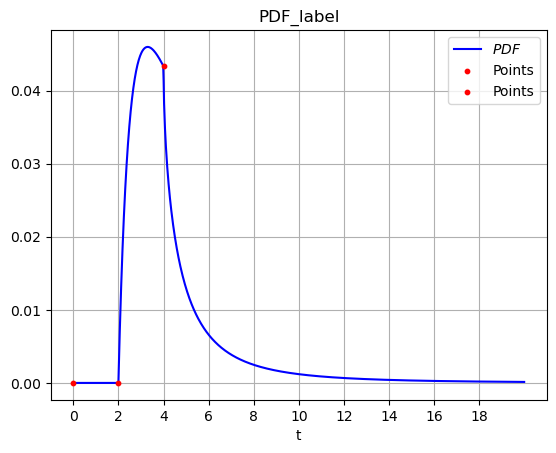

['x0 = 1', 'y0 = 2', 'top = 1/2 - x/2', 'bottom1 = 1/2 - x', 'bottom2 = 1/4 - 5*x/8', 'point1 = 2/3', 'left = 0']
timeEnter:           2
timeLeftEnd: None
timeBottom1:           8
timePoint1:           9
timeBottom2:           8
timePoint2:           8
timeLeftEndA: None
timePoint2A:           8
timePoint1A: None
f$010$011$000
f$011$111$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 8},{f$010$011$000, 8 <= t < 9},{f$011$111$000, 9 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '8'], ['8', '9'], ['9', 'Infinity']]
cs for graph: [['0', '2'], ['2', '8'], ['8', '9'], ['9', 20]]


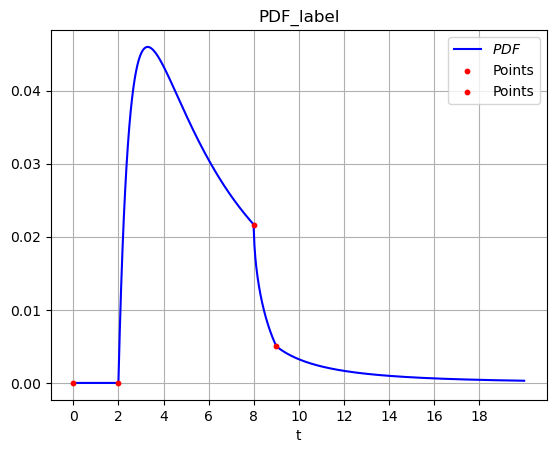

['x0 = 9/2', 'y0 = 2', 'top = 1/2 - 9*x/4', 'bottom1 = 1/2 - 5*x/2', 'left = 0']
timeEnter:           2
timeLeftEnd: None
timeBottom1:           4
timePoint1:           4
timeLeftEndA: None
timePoint1A:           4
f$011$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 4},{f$011$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '4'], ['4', 'Infinity']]
cs for graph: [['0', '2'], ['2', '4'], ['4', 20]]


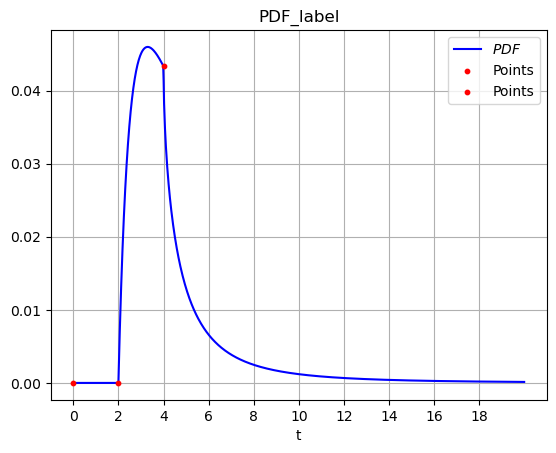

['x0 = 5', 'y0 = 2', 'top = 1/2 - 5*x/2', 'bottom1 = 1/2 - 11*x/4', 'left = 0']
timeEnter:           2
timeLeftEnd: None
timeBottom1:           4
timePoint1:           4
timeLeftEndA: None
timePoint1A:           4
f$011$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 4},{f$011$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '4'], ['4', 'Infinity']]
cs for graph: [['0', '2'], ['2', '4'], ['4', 20]]


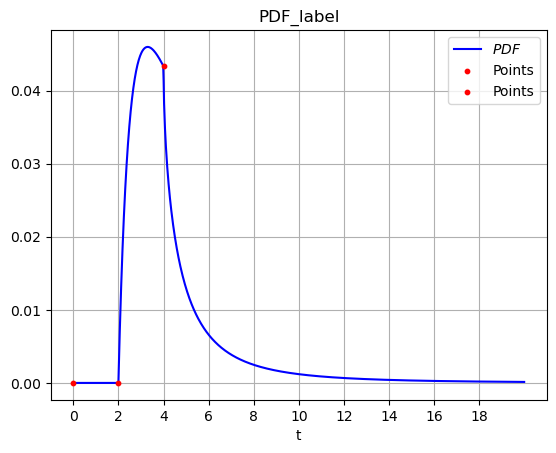

['x0 = 1/2', 'y0 = 2', 'top = 1/2 - x/4', 'bottom1 = 1/2 - x/2', 'left = 0']
timeEnter:           2
timeLeftEnd: None
timeBottom1:           4
timePoint1:           4
timeLeftEndA: None
timePoint1A:           4
f$011$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 4},{f$011$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '4'], ['4', 'Infinity']]
cs for graph: [['0', '2'], ['2', '4'], ['4', 20]]


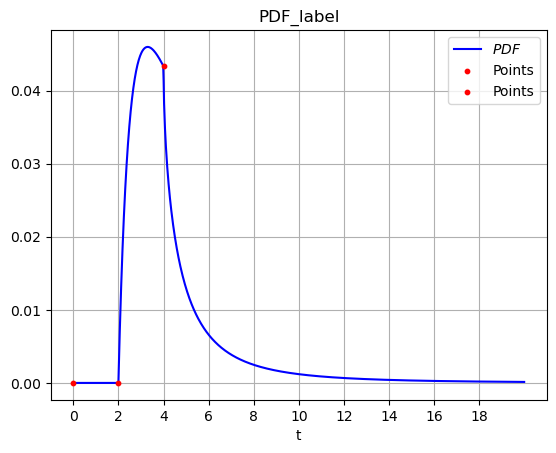

['x0 = 5/2', 'y0 = 4', 'top = 1/4 - 5*x/8', 'bottom1 = 1/2 - x', 'left = 2/3']
timeEnter:           4
timeLeftEnd:           6
timeBottom1:           6
timePoint1:           8
timeLeftEndA:           6
timePoint1A: None
f$110$000$000
f$111$000$000
combined = Piecewise[{{0, 0 <= t < 4},{f1, 4 <= t < 6},{f$110$000$000, 6 <= t < 8}}]
cs orig: [['0', '4'], ['4', '6'], ['6', '8']]


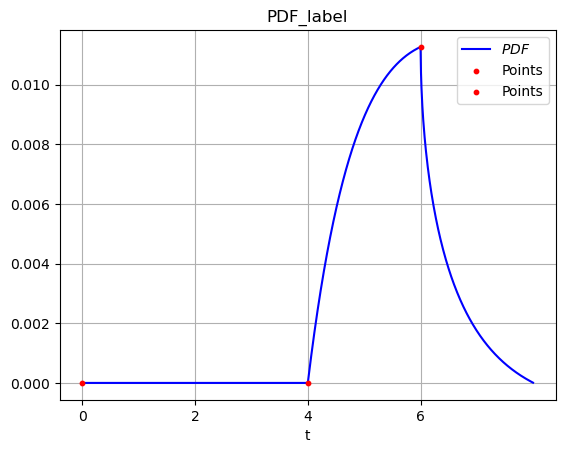

LaTeX file saved: 0
PDF successfully created: 0
section 1
['x0 = 5/3', 'y0 = 1', 'top = 1 - 5*x/3', 'bottom1 = 1 - 8*x/3', 'left = 0']
timeEnter:           1
timeLeftEnd: None
timeBottom1:           4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


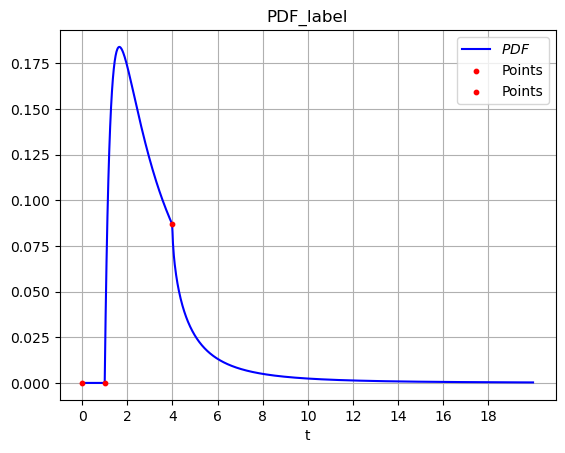

['x0 = 2/3', 'y0 = 1', 'top = 1 - 2*x/3', 'bottom1 = 1 - 5*x/3', 'left = 0']
timeEnter:           1
timeLeftEnd: None
timeBottom1:           4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


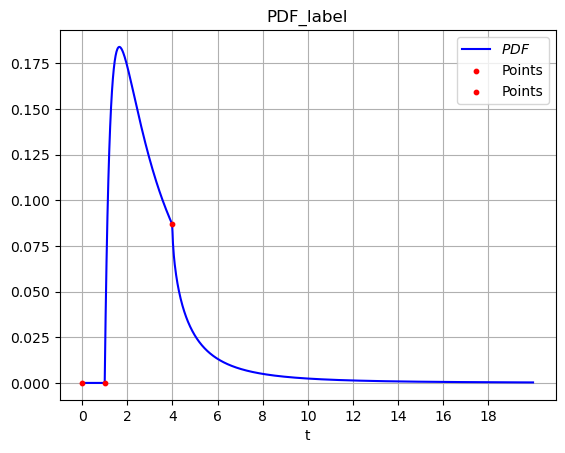

LaTeX file saved: 1
PDF successfully created: 1
section 2
['x0 = 2', 'y0 = 2', 'top = 1/2 - x', 'bottom1 = 1/2 - 3*x/2', 'left = 0']
timeEnter:           2
timeLeftEnd: None
timeBottom1:           8
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 8},{f$010$000$000, 8 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '8'], ['8', 'Infinity']]
cs for graph: [['0', '2'], ['2', '8'], ['8', 20]]


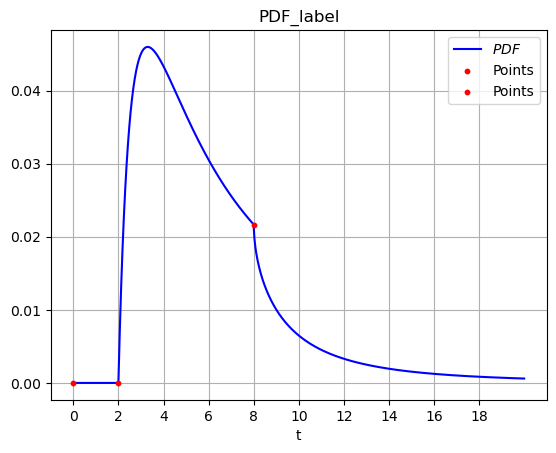

['x0 = 1', 'y0 = 2', 'top = 1/2 - x/2', 'bottom1 = 1/2 - x', 'bottom2 = 1/3 - 2*x/3', 'point1 = 1/2', 'left = 0']
timeEnter:           2
timeLeftEnd: None
timeBottom1:           8
timePoint1:           8
timeBottom2:           6
timePoint2:           6
timeLeftEndA: None
timePoint2A:           6
timePoint1A: None
f$000$011$000
f$011$111$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 6},{f$000$011$000, 6 <= t < 8},{f$011$111$000, 8 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '6'], ['6', '8'], ['8', 'Infinity']]
cs for graph: [['0', '2'], ['2', '6'], ['6', '8'], ['8', 20]]


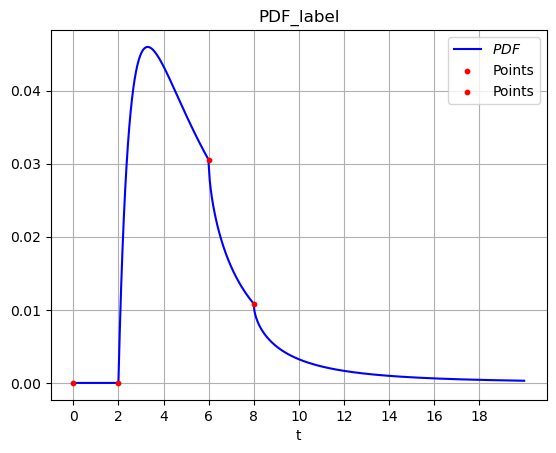

['x0 = 2', 'y0 = 3', 'top = 1/3 - 2*x/3', 'bottom1 = 1/2 - x', 'left = 1/2']
timeEnter:            3
timeLeftEnd:            6
timeBottom1:            16
           --
           3
timePoint1:            6
timeLeftEndA: None
timePoint1A: None
f$010$000$000
f$111$000$000
combined = Piecewise[{{0, 0 <= t < 3},{f1, 3 <= t < 16/3},{f$010$000$000, 16/3 <= t < 6}}]
cs orig: [['0', '3'], ['3', '16/3'], ['16/3', '6']]


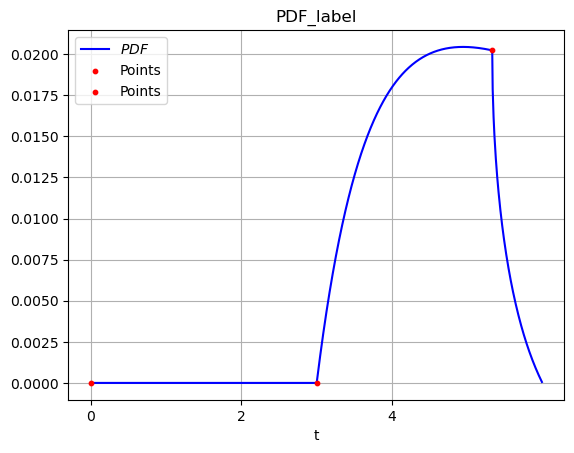

LaTeX file saved: 2
PDF successfully created: 2
section 3
['x0 = 3/2', 'y0 = 1', 'top = 1 - 3*x/2', 'bottom1 = 1 - 7*x/2', 'bottom2 = 1/2 - 2*x', 'point1 = 1/3', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            8
timePoint1:            9
timeBottom2:            8
timePoint2: None
timeLeftEndA: None
timePoint2A: None
timePoint1A: None
f$010$010$000
f$011$110$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 8},{f$010$010$000, 8 <= t < 9},{f$011$110$000, 9 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '8'], ['8', '9'], ['9', 'Infinity']]
cs for graph: [['0', '1'], ['1', '8'], ['8', '9'], ['9', 20]]


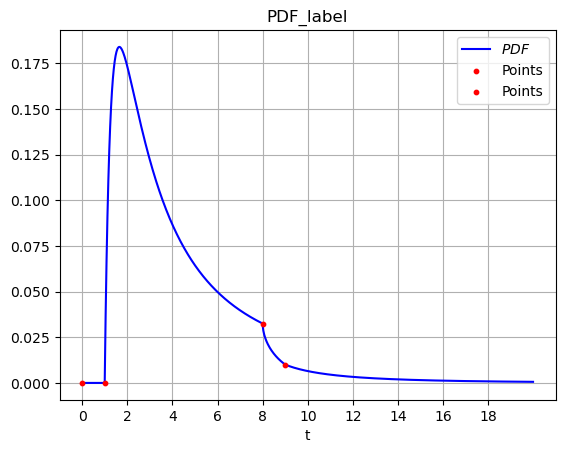

['x0 = 7/2', 'y0 = 1', 'top = 1 - 7*x/2', 'bottom1 = 1 - 9*x/2', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


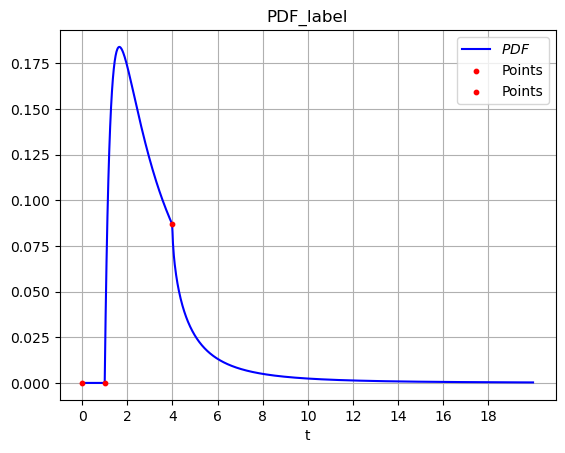

['x0 = 1/2', 'y0 = 1', 'top = 1 - x/2', 'bottom1 = 1 - 3*x/2', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


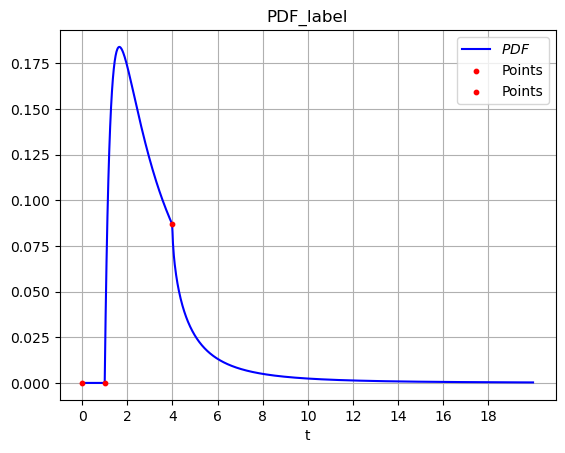

['x0 = 4', 'y0 = 2', 'top = 1/2 - 2*x', 'bottom1 = 1 - 7*x/2', 'bottom2 = 1/3 - 13*x/6', 'point1 = 1/2', 'left = 1/3']
timeEnter:            2
timeLeftEnd:            6
timeBottom1:            6
timePoint1:            8
timeBottom2:            6
timePoint2:            6
timeLeftEndA:            6
timePoint2A:            6
timePoint1A: None
f$110$011$000
f$111$111$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 6},{f$110$011$000, 6 <= t < 8}}]
cs orig: [['0', '2'], ['2', '6'], ['6', '8']]


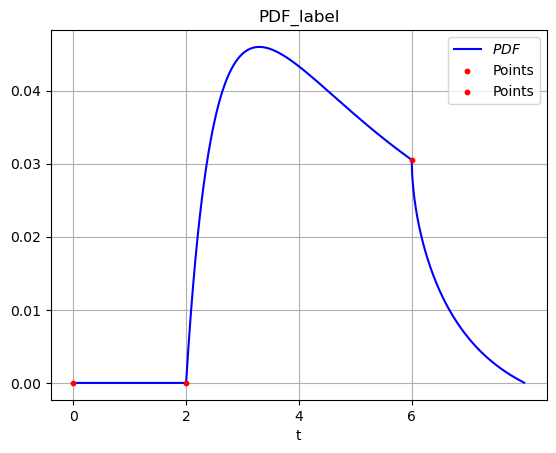

['x0 = 13/2', 'y0 = 3', 'top = 1/3 - 13*x/6', 'bottom1 = 1/2 - 5*x/2', 'left = 1/2']
timeEnter:            3
timeLeftEnd:            6
timeBottom1:            16
           --
           3
timePoint1:            6
timeLeftEndA: None
timePoint1A: None
f$010$000$000
f$111$000$000
combined = Piecewise[{{0, 0 <= t < 3},{f1, 3 <= t < 16/3},{f$010$000$000, 16/3 <= t < 6}}]
cs orig: [['0', '3'], ['3', '16/3'], ['16/3', '6']]


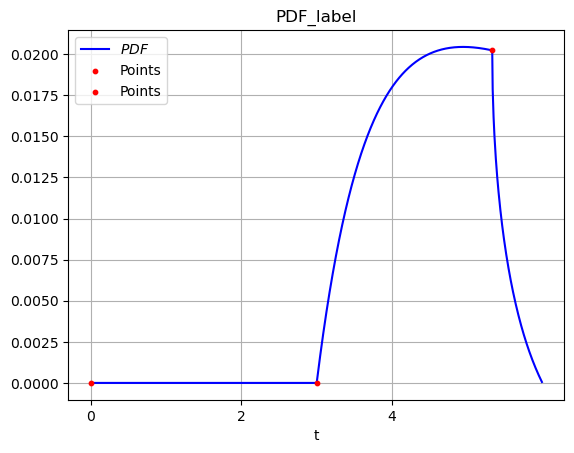

['x0 = 5', 'y0 = 2', 'top = 1/2 - 5*x/2', 'bottom1 = 1 - 7*x/2', 'left = 1/2']
timeEnter:            2
timeLeftEnd:            4
timeBottom1:            4
timePoint1: None
timeLeftEndA:            4
timePoint1A: None
f$110$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 4},{f$110$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '4'], ['4', 'Infinity']]
cs for graph: [['0', '2'], ['2', '4'], ['4', 20]]


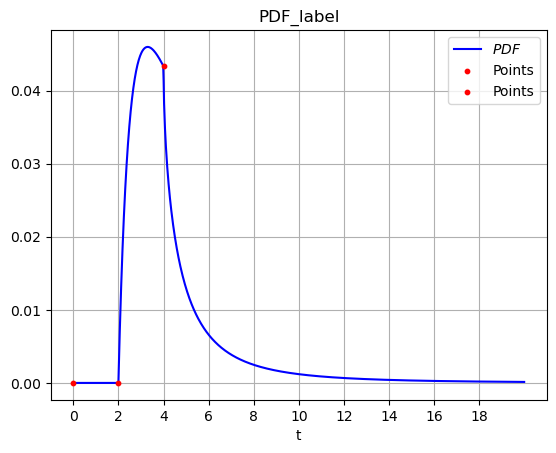

LaTeX file saved: 3
PDF successfully created: 3
section 4
['x0 = 3/2', 'y0 = 1', 'top = 1 - 3*x/2', 'bottom1 = 1 - 5*x/2', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


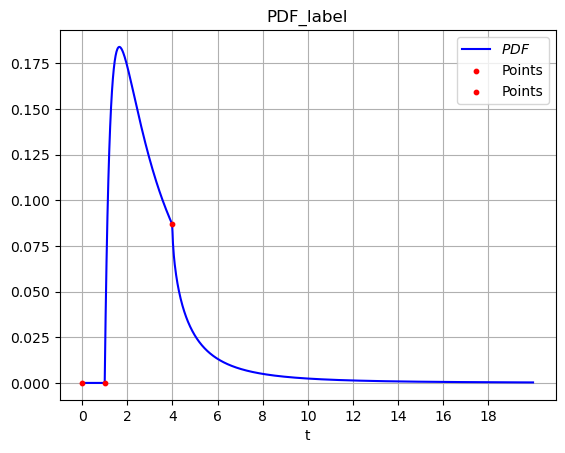

['x0 = 1/2', 'y0 = 1', 'top = 1 - x/2', 'bottom1 = 1 - 3*x/2', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


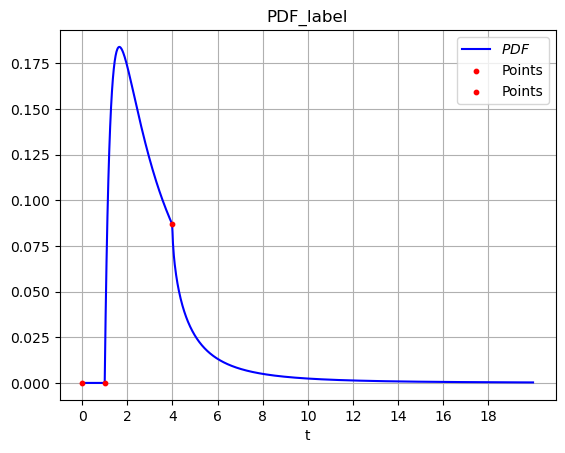

LaTeX file saved: 4
PDF successfully created: 4
section 5
['x0 = 29/6', 'y0 = 1', 'top = 1 - 29*x/6', 'bottom1 = 1 - 35*x/6', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


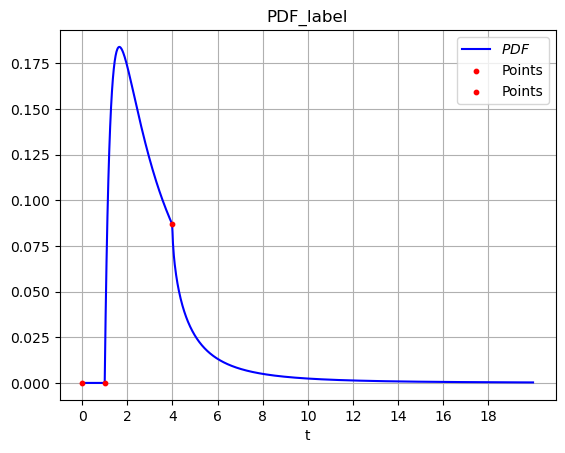

['x0 = 17/6', 'y0 = 1', 'top = 1 - 17*x/6', 'bottom1 = 1 - 23*x/6', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


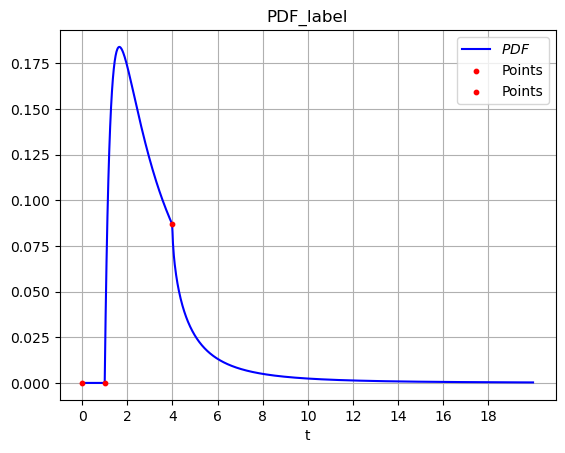

['x0 = 23/6', 'y0 = 1', 'top = 1 - 23*x/6', 'bottom1 = 1 - 29*x/6', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


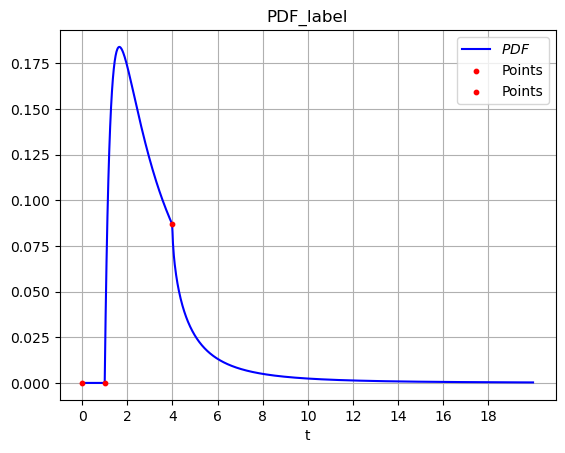

['x0 = 11/6', 'y0 = 1', 'top = 1 - 11*x/6', 'bottom1 = 1 - 17*x/6', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


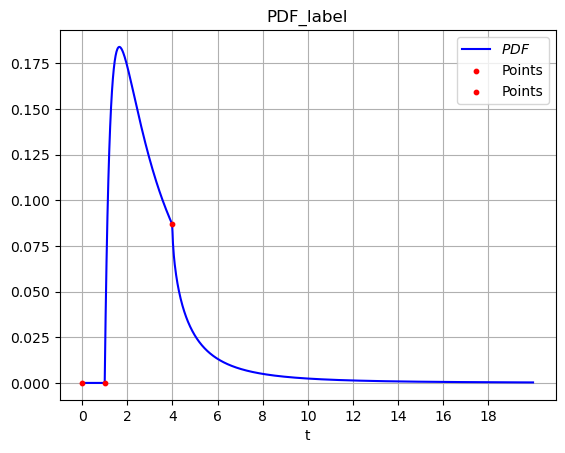

['x0 = 35/6', 'y0 = 1', 'top = 1 - 35*x/6', 'bottom1 = 1 - 41*x/6', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


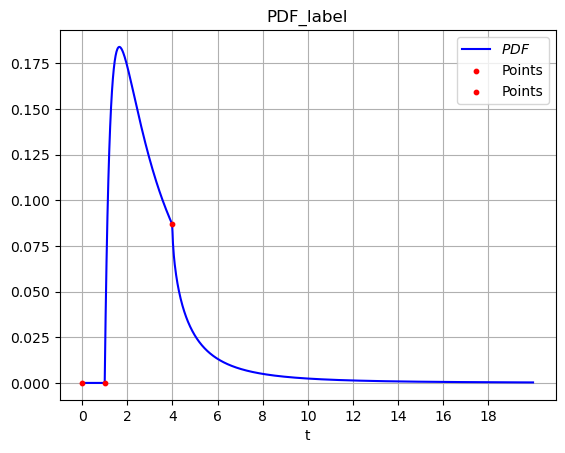

['x0 = 5/6', 'y0 = 1', 'top = 1 - 5*x/6', 'bottom1 = 1 - 11*x/6', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


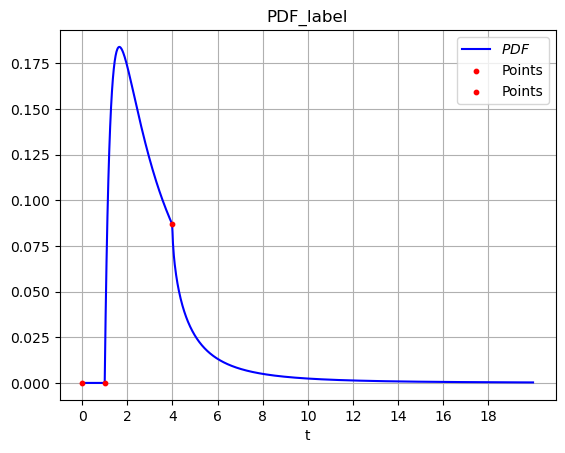

LaTeX file saved: 5
PDF successfully created: 5
section 6
['x0 = 13/7', 'y0 = 1', 'top = 1 - 13*x/7', 'bottom1 = 1 - 20*x/7', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


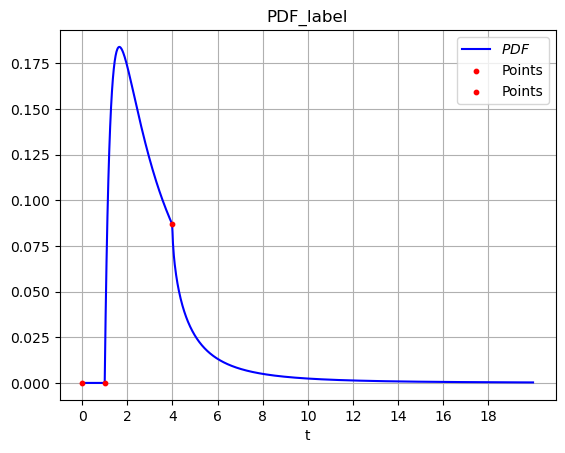

['x0 = 20/7', 'y0 = 1', 'top = 1 - 20*x/7', 'bottom1 = 1 - 27*x/7', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


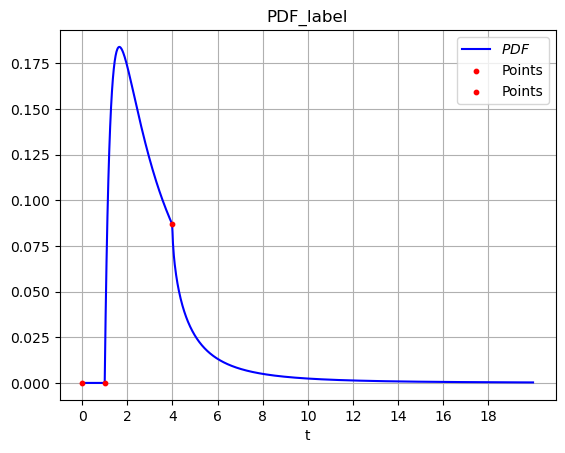

['x0 = 6/7', 'y0 = 1', 'top = 1 - 6*x/7', 'bottom1 = 1 - 13*x/7', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


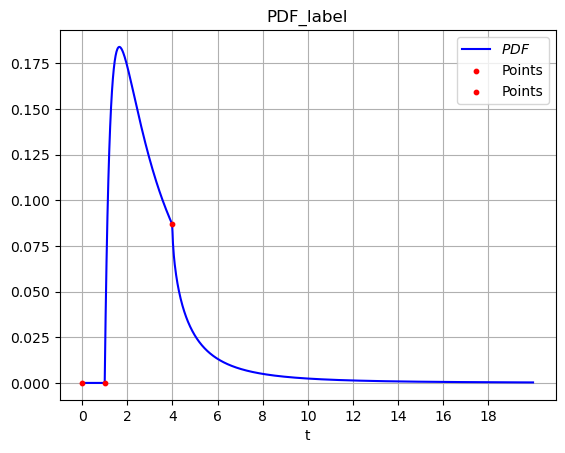

LaTeX file saved: 6
PDF successfully created: 6
section 7
['x0 = 9', 'y0 = 1', 'top = 1 - 9*x', 'bottom1 = 1 - 10*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


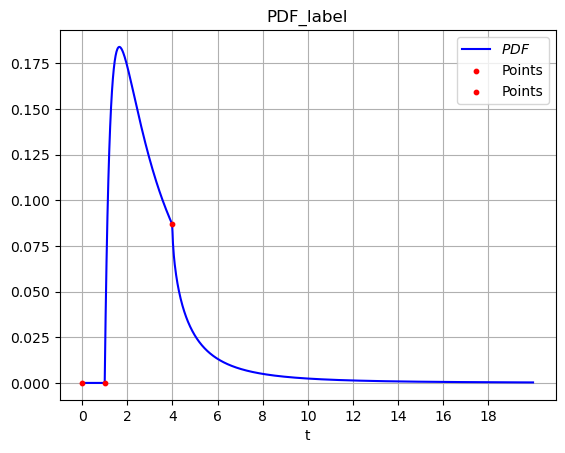

['x0 = 5', 'y0 = 1', 'top = 1 - 5*x', 'bottom1 = 1 - 6*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


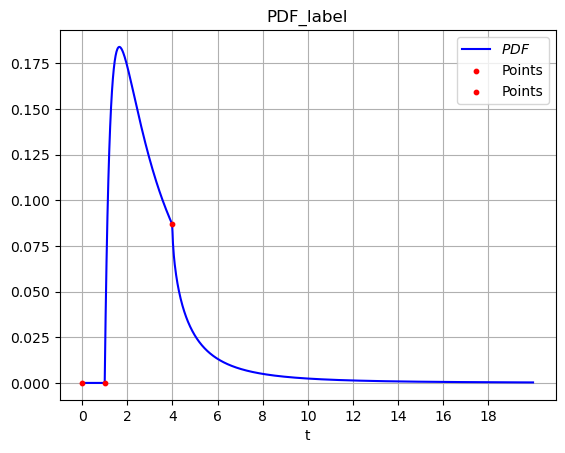

['x0 = 10', 'y0 = 1', 'top = 1 - 10*x', 'bottom1 = 1 - 11*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


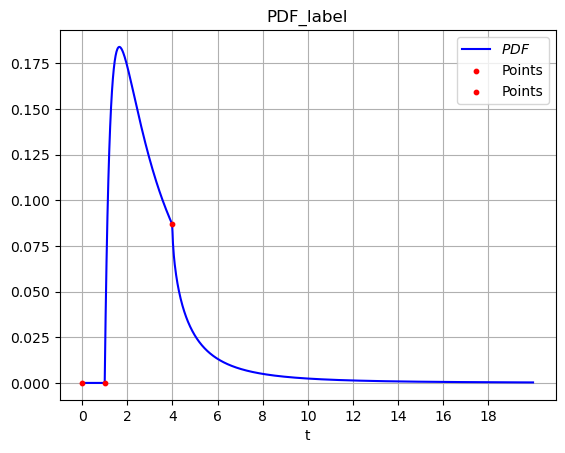

['x0 = 7', 'y0 = 1', 'top = 1 - 7*x', 'bottom1 = 1 - 8*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


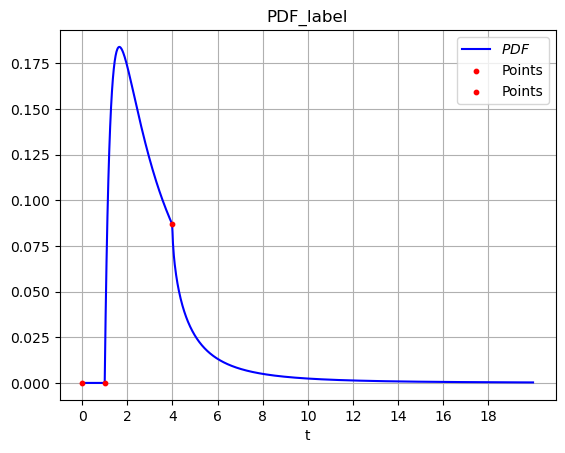

['x0 = 3', 'y0 = 1', 'top = 1 - 3*x', 'bottom1 = 1 - 5*x', 'bottom2 = 1/2 - 7*x/2', 'point1 = 1/3', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            8
timePoint1:            9
timeBottom2:            8
timePoint2: None
timeLeftEndA: None
timePoint2A: None
timePoint1A: None
f$010$010$000
f$011$110$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 8},{f$010$010$000, 8 <= t < 9},{f$011$110$000, 9 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '8'], ['8', '9'], ['9', 'Infinity']]
cs for graph: [['0', '1'], ['1', '8'], ['8', '9'], ['9', 20]]


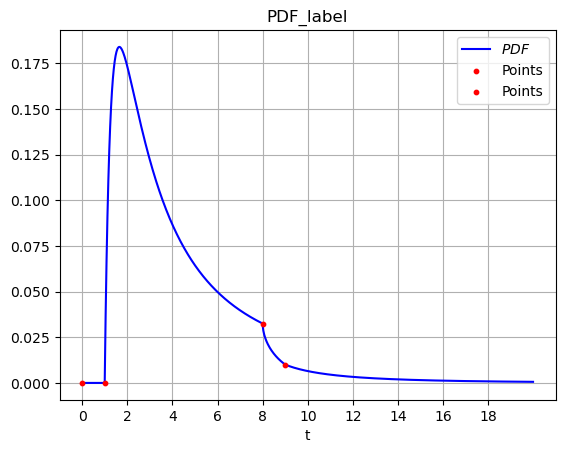

['x0 = 8', 'y0 = 1', 'top = 1 - 8*x', 'bottom1 = 1 - 9*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


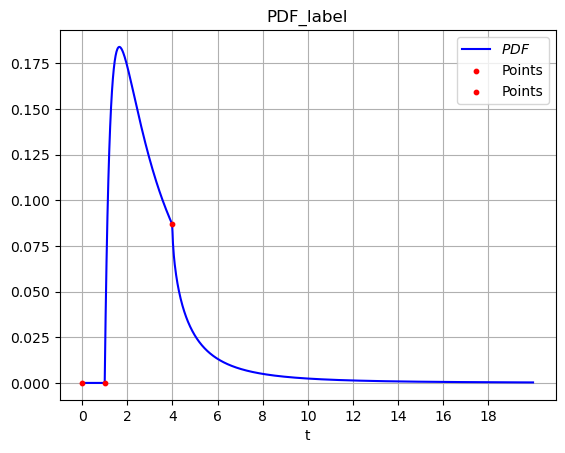

['x0 = 11', 'y0 = 1', 'top = 1 - 11*x', 'bottom1 = 1 - 13*x', 'bottom2 = 1/3 - 34*x/3', 'point1 = 2/5', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            8
timePoint1:            25
           --
           2
timeBottom2:            12
timePoint2: None
timeLeftEndA: None
timePoint2A: None
timePoint1A: None
f$010$000$000
f$010$010$000
f$011$110$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 8},{f$010$000$000, 8 <= t < 12},{f$010$010$000, 12 <= t < 25/2},{f$011$110$000, 25/2 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '8'], ['8', '12'], ['12', '25/2'], ['25/2', 'Infinity']]
cs for graph: [['0', '1'], ['1', '8'], ['8', '12'], ['12', '25/2'], ['25/2', 22]]


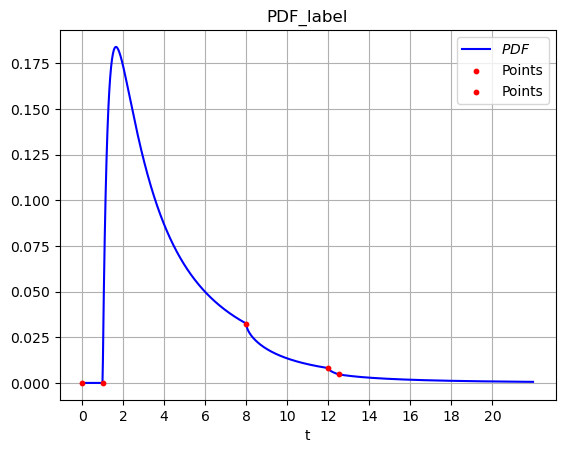

['x0 = 6', 'y0 = 1', 'top = 1 - 6*x', 'bottom1 = 1 - 7*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


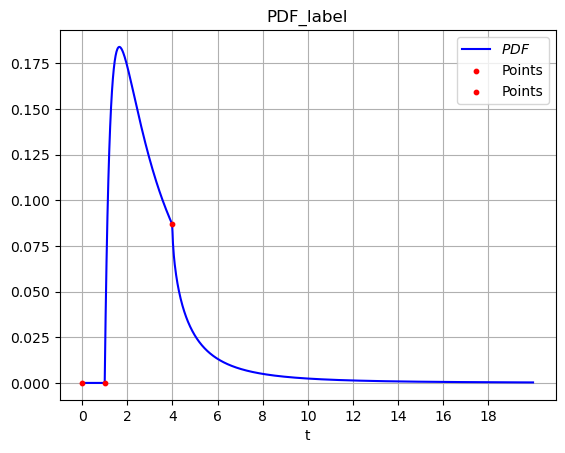

['x0 = 2', 'y0 = 1', 'top = 1 - 2*x', 'bottom1 = 1 - 3*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


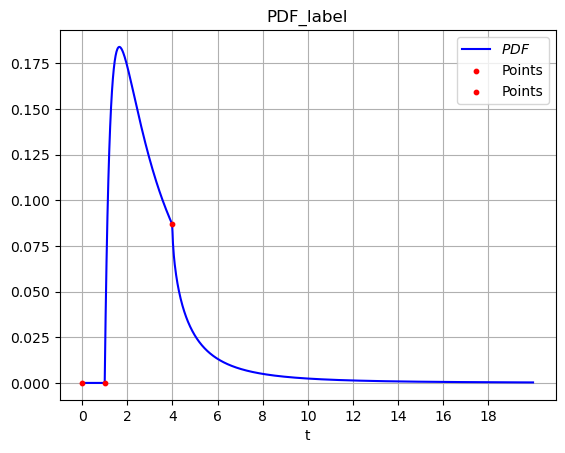

['x0 = 1', 'y0 = 1', 'top = 1 - x', 'bottom1 = 1 - 2*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


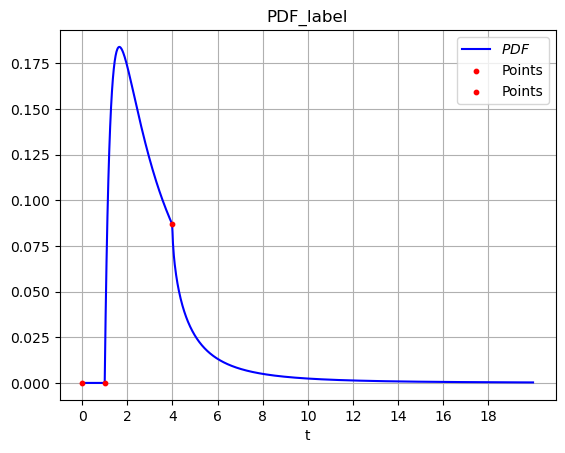

['x0 = 7', 'y0 = 2', 'top = 1/2 - 7*x/2', 'bottom1 = 1 - 5*x', 'bottom2 = 1/3 - 11*x/3', 'point1 = 1/2', 'left = 1/3']
timeEnter:            2
timeLeftEnd:            6
timeBottom1:            6
timePoint1:            8
timeBottom2:            6
timePoint2:            6
timeLeftEndA:            6
timePoint2A:            6
timePoint1A: None
f$110$011$000
f$111$111$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 6},{f$110$011$000, 6 <= t < 8}}]
cs orig: [['0', '2'], ['2', '6'], ['6', '8']]


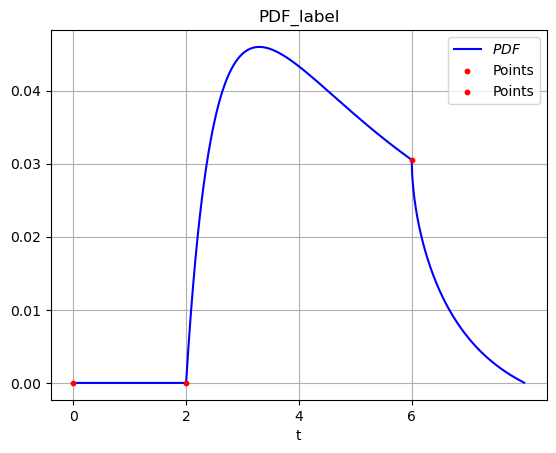

['x0 = 34', 'y0 = 3', 'top = 1/3 - 34*x/3', 'bottom1 = 1 - 13*x', 'bottom2 = 1/5 - 57*x/5', 'point1 = 1/2', 'left = 2/5']
timeEnter:            3
timeLeftEnd: None
timeBottom1:            20
           --
           3
timePoint1:            12
timeBottom2:            20
           --
           3
timePoint2: None
timeLeftEndA:            15
           --
           2
timePoint2A:            15
           --
           2
timePoint1A: None
f$110$011$000
f$111$111$000
combined = Piecewise[{{0, 0 <= t < 3},{f1, 3 <= t < 15/2},{f$110$011$000, 15/2 <= t < 12}}]
cs orig: [['0', '3'], ['3', '15/2'], ['15/2', '12']]


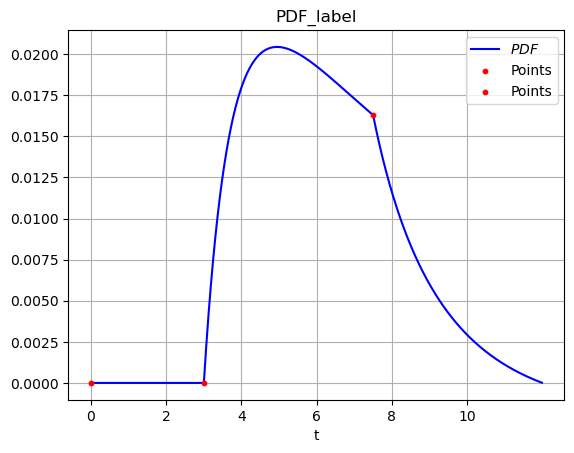

['x0 = 8', 'y0 = 2', 'top = 1/2 - 4*x', 'bottom1 = 1 - 5*x', 'left = 1/2']
timeEnter:            2
timeLeftEnd:            4
timeBottom1:            4
timePoint1: None
timeLeftEndA:            4
timePoint1A: None
f$110$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 4},{f$110$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '4'], ['4', 'Infinity']]
cs for graph: [['0', '2'], ['2', '4'], ['4', 20]]


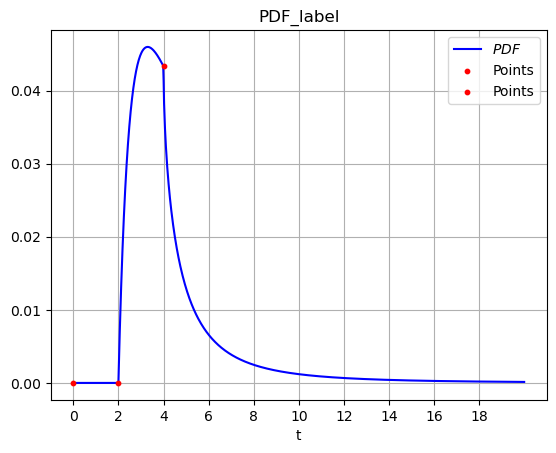

['x0 = 11', 'y0 = 3', 'top = 1/3 - 11*x/3', 'bottom1 = 1/2 - 4*x', 'left = 1/2']
timeEnter:            3
timeLeftEnd:            6
timeBottom1:            16
           --
           3
timePoint1:            6
timeLeftEndA: None
timePoint1A: None
f$010$000$000
f$111$000$000
combined = Piecewise[{{0, 0 <= t < 3},{f1, 3 <= t < 16/3},{f$010$000$000, 16/3 <= t < 6}}]
cs orig: [['0', '3'], ['3', '16/3'], ['16/3', '6']]


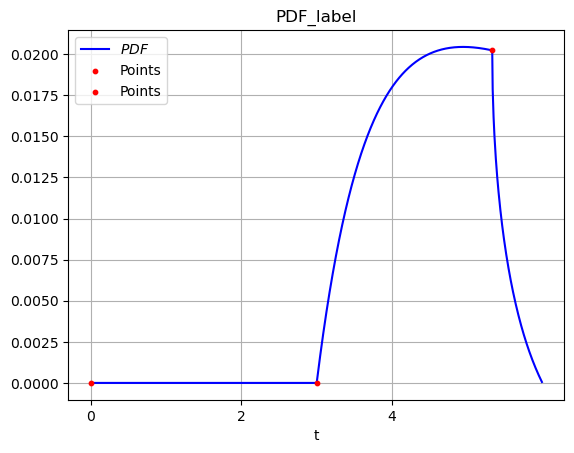

['x0 = 57', 'y0 = 5', 'top = 1/5 - 57*x/5', 'bottom1 = 1/4 - 23*x/2', 'left = 1/2']
timeEnter:            5
timeLeftEnd:            10
timeBottom1:            32
           --
           5
timePoint1: None
timeLeftEndA: None
timePoint1A:            20
           --
           3
f$011$000$000
f$111$000$000
combined = Piecewise[{{0, 0 <= t < 5},{f1, 5 <= t < 20/3},{f$011$000$000, 20/3 <= t < 10}}]
cs orig: [['0', '5'], ['5', '20/3'], ['20/3', '10']]


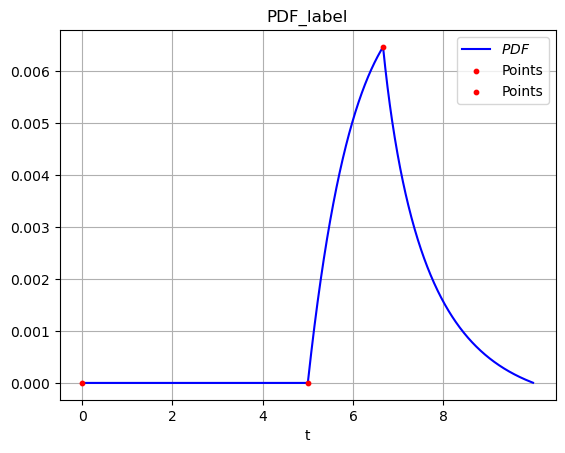

['x0 = 35', 'y0 = 3', 'top = 1/3 - 35*x/3', 'bottom1 = 1/2 - 12*x', 'left = 1/2']
timeEnter:            3
timeLeftEnd:            6
timeBottom1:            16
           --
           3
timePoint1:            6
timeLeftEndA: None
timePoint1A: None
f$010$000$000
f$111$000$000
combined = Piecewise[{{0, 0 <= t < 3},{f1, 3 <= t < 16/3},{f$010$000$000, 16/3 <= t < 6}}]
cs orig: [['0', '3'], ['3', '16/3'], ['16/3', '6']]


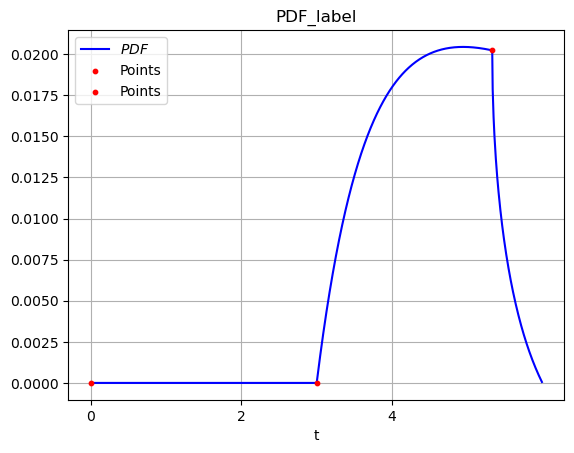

['x0 = 24', 'y0 = 2', 'top = 1/2 - 12*x', 'bottom1 = 1 - 13*x', 'left = 1/2']
timeEnter:            2
timeLeftEnd:            4
timeBottom1:            4
timePoint1: None
timeLeftEndA:            4
timePoint1A: None
f$110$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 4},{f$110$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '4'], ['4', 'Infinity']]
cs for graph: [['0', '2'], ['2', '4'], ['4', 20]]


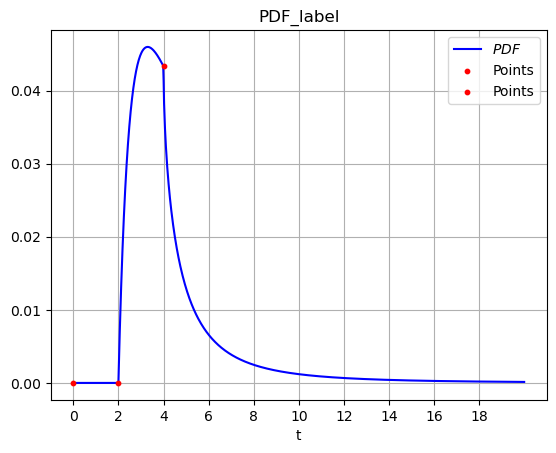

['x0 = 46', 'y0 = 4', 'top = 1/4 - 23*x/2', 'bottom1 = 1/3 - 35*x/3', 'left = 1/2']
timeEnter:            4
timeLeftEnd:            8
timeBottom1:            6
timePoint1:            6
timeLeftEndA: None
timePoint1A:            6
f$011$000$000
f$111$000$000
combined = Piecewise[{{0, 0 <= t < 4},{f1, 4 <= t < 6},{f$011$000$000, 6 <= t < 8}}]
cs orig: [['0', '4'], ['4', '6'], ['6', '8']]


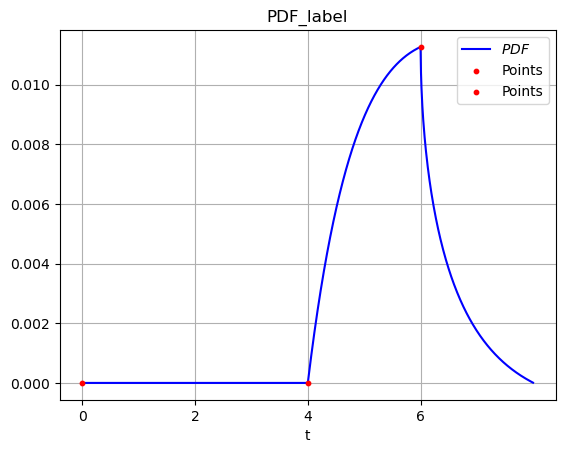

LaTeX file saved: 7
PDF successfully created: 7
section 8
['x0 = 4', 'y0 = 1', 'top = 1 - 4*x', 'bottom1 = 1 - 5*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


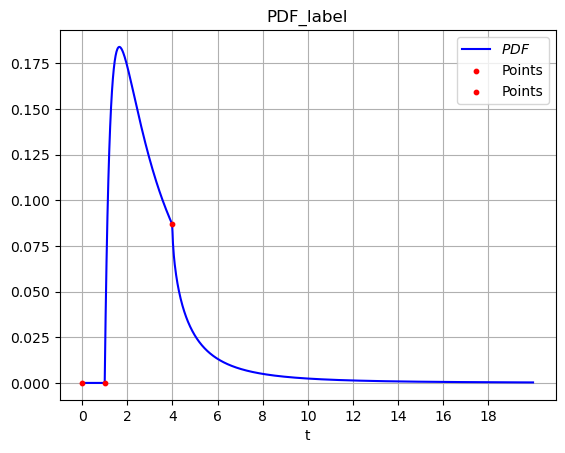

['x0 = 5', 'y0 = 1', 'top = 1 - 5*x', 'bottom1 = 1 - 8*x', 'bottom2 = 1/2 - 11*x/2', 'point1 = 1/5', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            12
timePoint1:            25
           --
           2
timeBottom2:            8
timePoint2: None
timeLeftEndA: None
timePoint2A: None
timePoint1A: None
f$000$010$000
f$010$010$000
f$011$110$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 8},{f$000$010$000, 8 <= t < 12},{f$010$010$000, 12 <= t < 25/2},{f$011$110$000, 25/2 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '8'], ['8', '12'], ['12', '25/2'], ['25/2', 'Infinity']]
cs for graph: [['0', '1'], ['1', '8'], ['8', '12'], ['12', '25/2'], ['25/2', 22]]


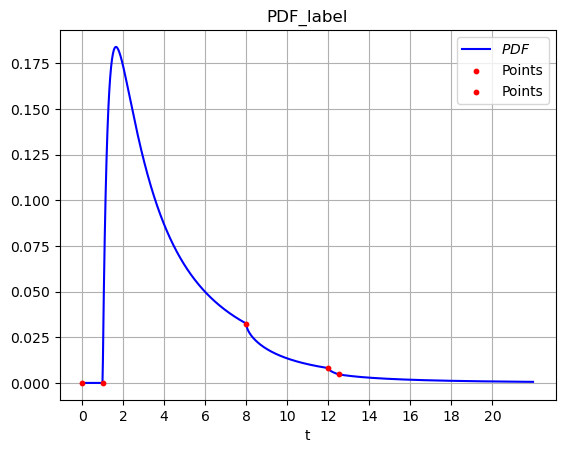

['x0 = 3', 'y0 = 1', 'top = 1 - 3*x', 'bottom1 = 1 - 4*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


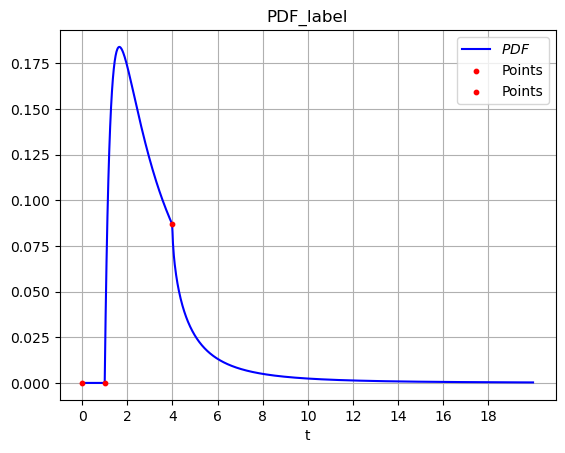

['x0 = 2', 'y0 = 1', 'top = 1 - 2*x', 'bottom1 = 1 - 3*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


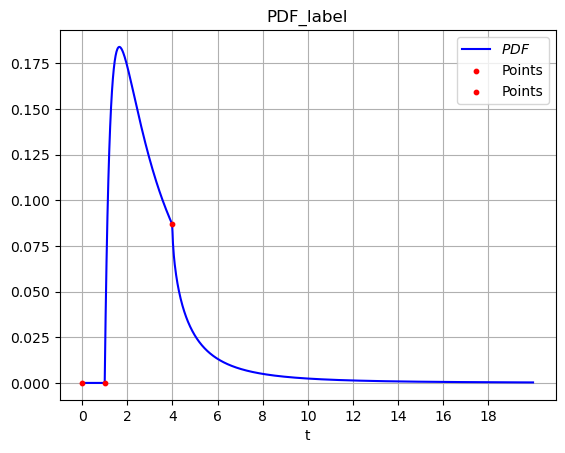

['x0 = 1', 'y0 = 1', 'top = 1 - x', 'bottom1 = 1 - 2*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


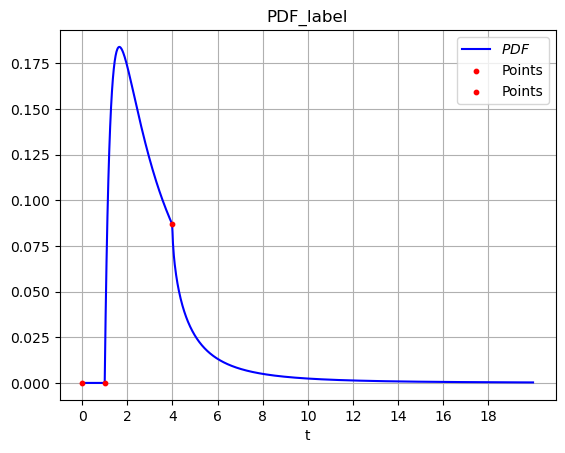

['x0 = 11', 'y0 = 2', 'top = 1/2 - 11*x/2', 'bottom1 = 1 - 8*x', 'bottom2 = 1/2 - 6*x', 'bottom3 = 1/3 - 17*x/3', 'point1 = 1/4', 'point2 = 1/2', 'left = 1/5']
timeEnter:            2
timeLeftEnd:            10
timeBottom1:            10
timePoint1:            32
           --
           3
timeBottom2:            8
timePoint2:            8
timeBottom3:            6
timeRightEnd:            6
timeLeftEndA:            10
timeRightEndA:            6
timePoint1A: None
timePoint2A: None
f$000$000$011
f$000$011$111
f$110$011$111
f$111$111$111
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 6},{f$000$000$011, 6 <= t < 8},{f$000$011$111, 8 <= t < 10},{f$110$011$111, 10 <= t < 32/3}}]
cs orig: [['0', '2'], ['2', '6'], ['6', '8'], ['8', '10'], ['10', '32/3']]


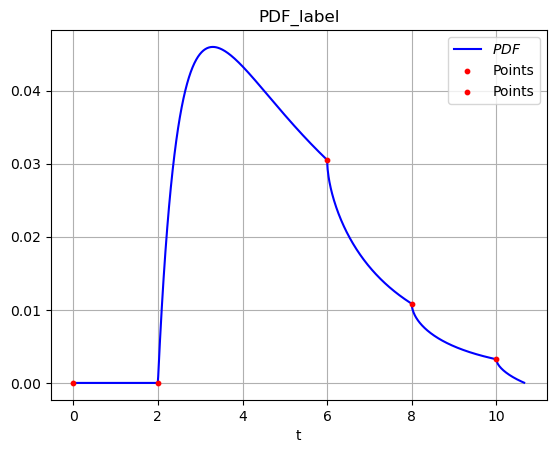

['x0 = 12', 'y0 = 2', 'top = 1/2 - 6*x', 'bottom1 = 1 - 8*x', 'bottom2 = 1/2 - 13*x/2', 'point1 = 1/3', 'left = 1/4']
timeEnter:            2
timeLeftEnd:            8
timeBottom1:            8
timePoint1:            9
timeBottom2:            8
timePoint2: None
timeLeftEndA:            8
timePoint2A: None
timePoint1A: None
f$110$010$000
f$111$110$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 8},{f$110$010$000, 8 <= t < 9},{f$111$110$000, 9 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '8'], ['8', '9'], ['9', 'Infinity']]
cs for graph: [['0', '2'], ['2', '8'], ['8', '9'], ['9', 20]]


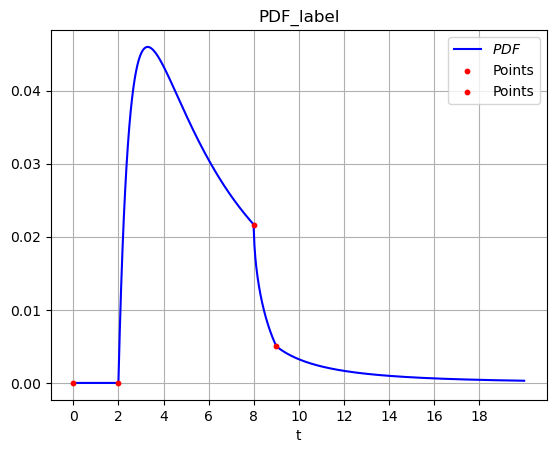

['x0 = 13', 'y0 = 2', 'top = 1/2 - 13*x/2', 'bottom1 = 1 - 8*x', 'bottom2 = 1/2 - 7*x', 'point1 = 1/2', 'left = 1/3']
timeEnter:            2
timeLeftEnd:            6
timeBottom1:            6
timePoint1:            8
timeBottom2:            8
timePoint2: None
timeLeftEndA:            6
timePoint2A: None
timePoint1A: None
f$110$000$000
f$111$110$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 6},{f$110$000$000, 6 <= t < 8},{f$111$110$000, 8 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '6'], ['6', '8'], ['8', 'Infinity']]
cs for graph: [['0', '2'], ['2', '6'], ['6', '8'], ['8', 20]]


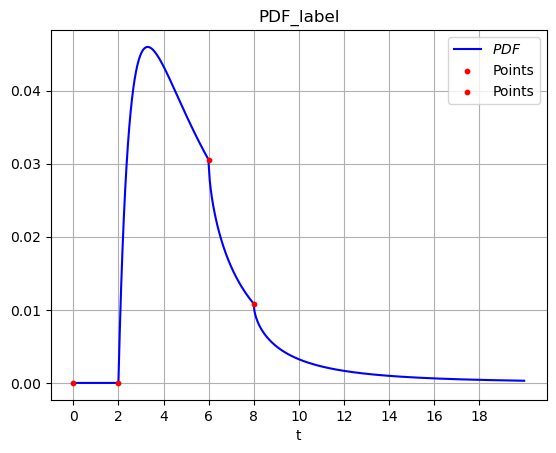

['x0 = 14', 'y0 = 2', 'top = 1/2 - 7*x', 'bottom1 = 1 - 8*x', 'left = 1/2']
timeEnter:            2
timeLeftEnd:            4
timeBottom1:            4
timePoint1: None
timeLeftEndA:            4
timePoint1A: None
f$110$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 4},{f$110$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '4'], ['4', 'Infinity']]
cs for graph: [['0', '2'], ['2', '4'], ['4', 20]]


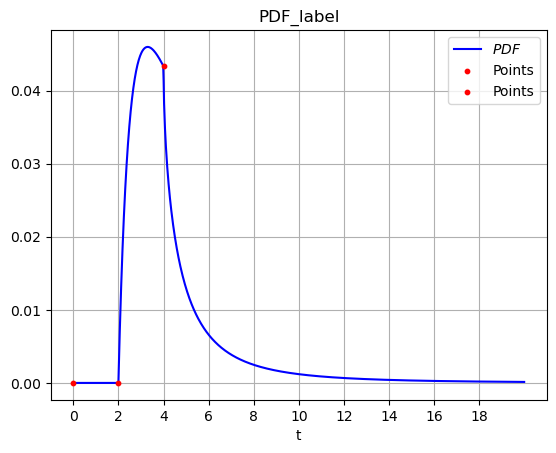

['x0 = 17', 'y0 = 3', 'top = 1/3 - 17*x/3', 'bottom1 = 1/2 - 6*x', 'left = 1/2']
timeEnter:            3
timeLeftEnd:            6
timeBottom1:            16
           --
           3
timePoint1:            6
timeLeftEndA: None
timePoint1A: None
f$010$000$000
f$111$000$000
combined = Piecewise[{{0, 0 <= t < 3},{f1, 3 <= t < 16/3},{f$010$000$000, 16/3 <= t < 6}}]
cs orig: [['0', '3'], ['3', '16/3'], ['16/3', '6']]


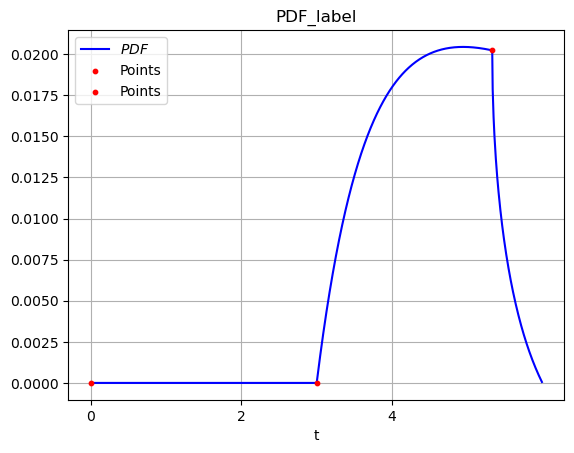

LaTeX file saved: 8
PDF successfully created: 8
section 9
['x0 = 4', 'y0 = 1', 'top = 1 - 4*x', 'bottom1 = 1 - 5*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


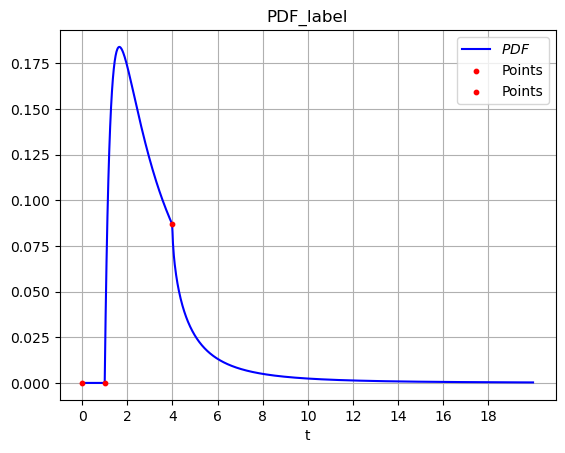

['x0 = 5', 'y0 = 1', 'top = 1 - 5*x', 'bottom1 = 1 - 6*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


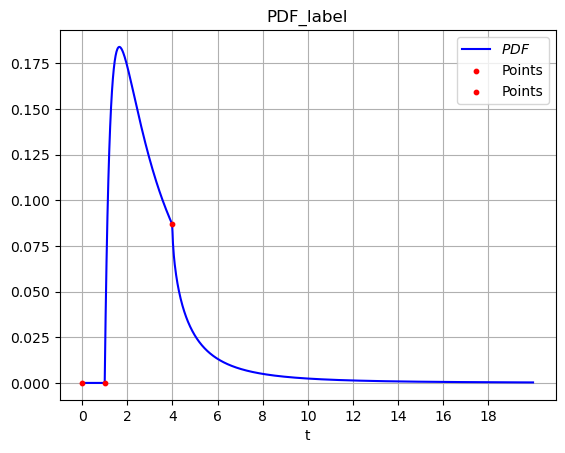

['x0 = 2', 'y0 = 1', 'top = 1 - 2*x', 'bottom1 = 1 - 4*x', 'bottom2 = 1/2 - 5*x/2', 'point1 = 1/3', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            8
timePoint1:            9
timeBottom2:            8
timePoint2: None
timeLeftEndA: None
timePoint2A: None
timePoint1A: None
f$010$010$000
f$011$110$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 8},{f$010$010$000, 8 <= t < 9},{f$011$110$000, 9 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '8'], ['8', '9'], ['9', 'Infinity']]
cs for graph: [['0', '1'], ['1', '8'], ['8', '9'], ['9', 20]]


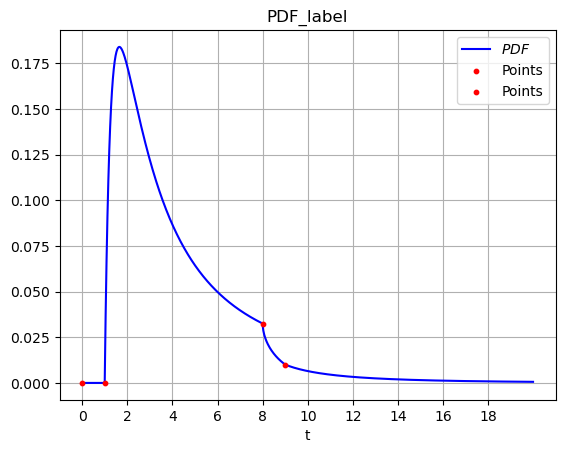

['x0 = 6', 'y0 = 1', 'top = 1 - 6*x', 'bottom1 = 1 - 8*x', 'bottom2 = 1/2 - 13*x/2', 'point1 = 1/3', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            8
timePoint1:            9
timeBottom2:            8
timePoint2: None
timeLeftEndA: None
timePoint2A: None
timePoint1A: None
f$010$010$000
f$011$110$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 8},{f$010$010$000, 8 <= t < 9},{f$011$110$000, 9 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '8'], ['8', '9'], ['9', 'Infinity']]
cs for graph: [['0', '1'], ['1', '8'], ['8', '9'], ['9', 20]]


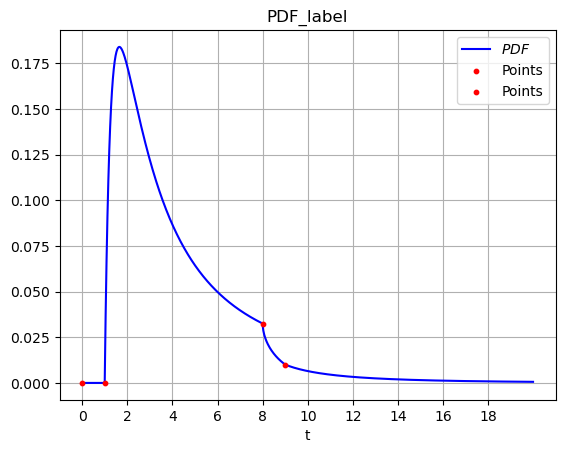

['x0 = 1', 'y0 = 1', 'top = 1 - x', 'bottom1 = 1 - 2*x', 'left = 0']
timeEnter:            1
timeLeftEnd: None
timeBottom1:            4
timePoint1: None
timeLeftEndA: None
timePoint1A: None
f$010$000$000
combined = Piecewise[{{0, 0 <= t < 1},{f1, 1 <= t < 4},{f$010$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '1'], ['1', '4'], ['4', 'Infinity']]
cs for graph: [['0', '1'], ['1', '4'], ['4', 20]]


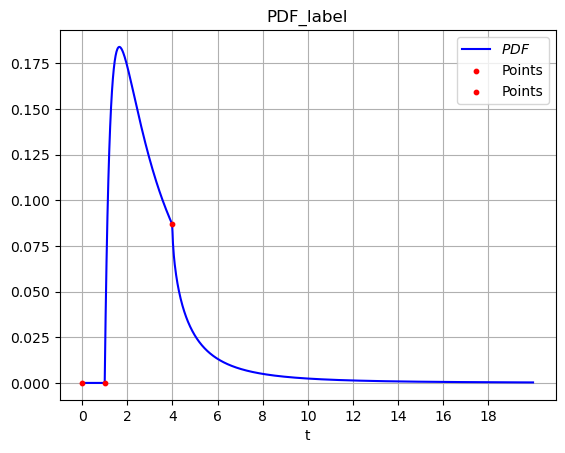

['x0 = 5', 'y0 = 2', 'top = 1/2 - 5*x/2', 'bottom1 = 1 - 4*x', 'bottom2 = 1/3 - 8*x/3', 'point1 = 1/2', 'left = 1/3']
timeEnter:            2
timeLeftEnd:            6
timeBottom1:            6
timePoint1:            8
timeBottom2:            6
timePoint2:            6
timeLeftEndA:            6
timePoint2A:            6
timePoint1A: None
f$110$011$000
f$111$111$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 6},{f$110$011$000, 6 <= t < 8}}]
cs orig: [['0', '2'], ['2', '6'], ['6', '8']]


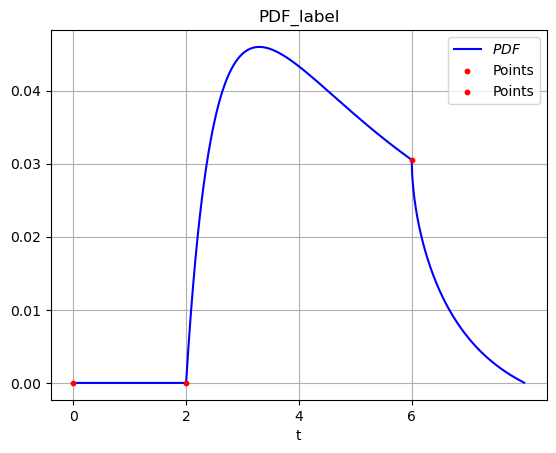

['x0 = 13', 'y0 = 2', 'top = 1/2 - 13*x/2', 'bottom1 = 1 - 8*x', 'bottom2 = 1/2 - 7*x', 'bottom3 = 1/5 - 33*x/5', 'point1 = 1/2', 'point2 = 3/4', 'left = 1/3']
timeEnter:            2
timeLeftEnd:            6
timeBottom1:            6
timePoint1:            8
timeBottom2:            8
timePoint2:            32
           --
           3
timeBottom3:            10
timeRightEnd:            10
timeLeftEndA:            6
timeRightEndA:            10
timePoint1A: None
timePoint2A: None
f$110$000$000
f$111$110$000
f$111$110$011
f$111$111$111
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 6},{f$110$000$000, 6 <= t < 8},{f$111$110$000, 8 <= t < 10},{f$111$110$011, 10 <= t < 32/3}}]
cs orig: [['0', '2'], ['2', '6'], ['6', '8'], ['8', '10'], ['10', '32/3']]


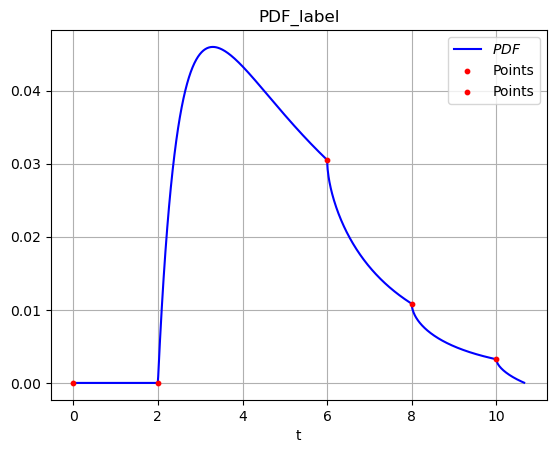

['x0 = 6', 'y0 = 2', 'top = 1/2 - 3*x', 'bottom1 = 1 - 4*x', 'left = 1/2']
timeEnter:            2
timeLeftEnd:            4
timeBottom1:            4
timePoint1: None
timeLeftEndA:            4
timePoint1A: None
f$110$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 4},{f$110$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '4'], ['4', 'Infinity']]
cs for graph: [['0', '2'], ['2', '4'], ['4', 20]]


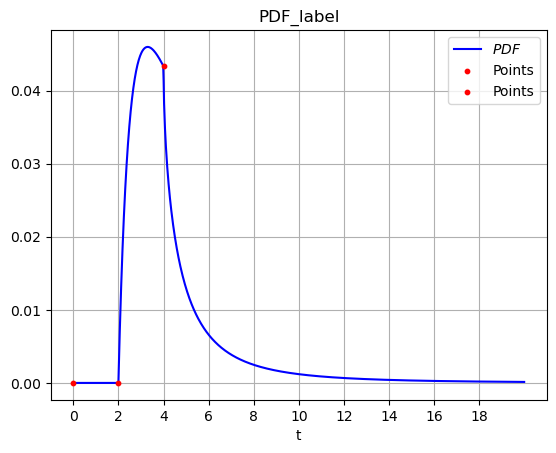

['x0 = 8', 'y0 = 3', 'top = 1/3 - 8*x/3', 'bottom1 = 1/2 - 3*x', 'left = 1/2']
timeEnter:            3
timeLeftEnd:            6
timeBottom1:            16
           --
           3
timePoint1:            6
timeLeftEndA: None
timePoint1A: None
f$010$000$000
f$111$000$000
combined = Piecewise[{{0, 0 <= t < 3},{f1, 3 <= t < 16/3},{f$010$000$000, 16/3 <= t < 6}}]
cs orig: [['0', '3'], ['3', '16/3'], ['16/3', '6']]


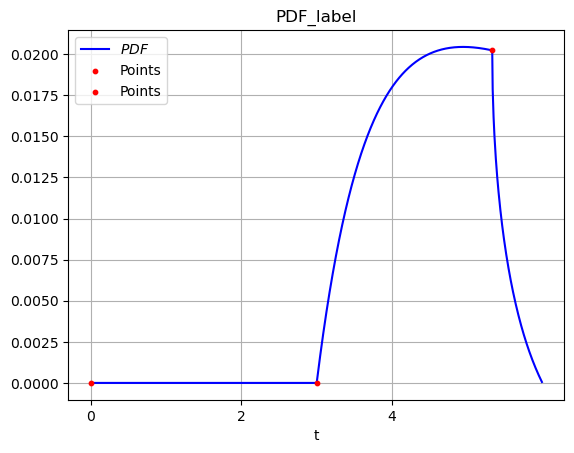

['x0 = 14', 'y0 = 2', 'top = 1/2 - 7*x', 'bottom1 = 1 - 8*x', 'left = 1/2']
timeEnter:            2
timeLeftEnd:            4
timeBottom1:            4
timePoint1: None
timeLeftEndA:            4
timePoint1A: None
f$110$000$000
combined = Piecewise[{{0, 0 <= t < 2},{f1, 2 <= t < 4},{f$110$000$000, 4 <= t < Infinity}}]
cs orig: [['0', '2'], ['2', '4'], ['4', 'Infinity']]
cs for graph: [['0', '2'], ['2', '4'], ['4', 20]]


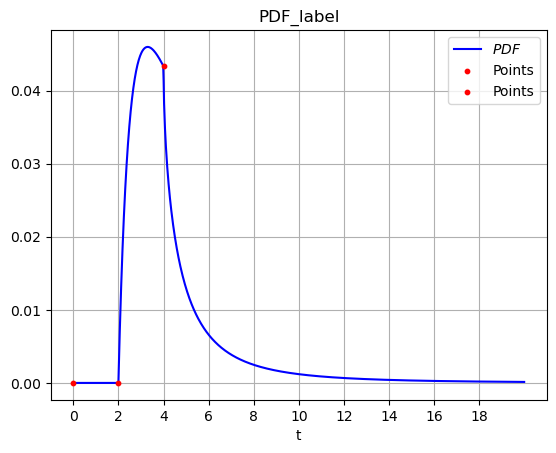

['x0 = 33', 'y0 = 5', 'top = 1/5 - 33*x/5', 'bottom1 = 1/2 - 7*x', 'left = 3/4']
timeEnter:            5
timeLeftEnd: None
timeBottom1:            32
           --
           5
timePoint1:            10
timeLeftEndA:            20
           --
           3
timePoint1A: None
f$110$000$000
f$111$000$000
combined = Piecewise[{{0, 0 <= t < 5},{f1, 5 <= t < 20/3},{f$110$000$000, 20/3 <= t < 10}}]
cs orig: [['0', '5'], ['5', '20/3'], ['20/3', '10']]


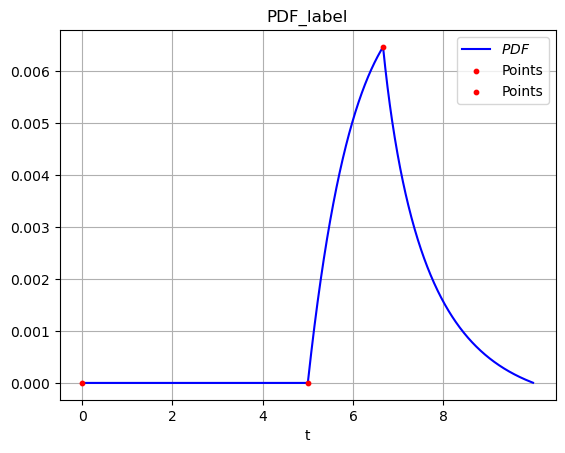

LaTeX file saved: 9
PDF successfully created: 9
0 1
1 2
2 3
3 4
4 5
5 16/3
16/3 6
6 20/3
20/3 15/2
15/2 8
8 9
9 10
10 32/3
32/3 12
12 25/2
25/2 Infinity


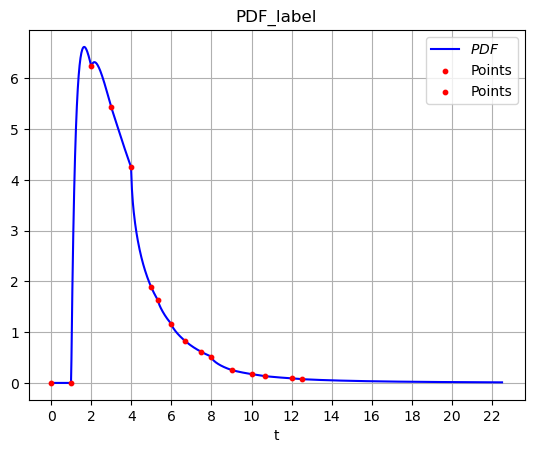

PDF successfully created: results/7 - 20/final_eq.pdf
integrals done: 0.4716725035508474

-----------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import os
import pwlf
from surface_dynamics.all import *
from Library import *
from Library import Section
import math
from time import time
import copy
from scipy import integrate
import sympy as sym
from sympy import Symbol, solve, lambdify
import traceback
import dill
import sys
import unittest
from surface_dynamics.all import Origami
from utils import load_arrays_from_file  # testing
import re
from sage.all import *
from surface_dynamics.all import Origami
from surface_dynamics.all import *
import numpy as np
from fractions import Fraction as frac
M = mathematica
from IPython.display import display, Math
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
from mathematica import *
from integration_functions import *
from sympy import symbols, And, Piecewise, Add, N
from sympy.core.relational import Relational
t = sp.Symbol('t')

t0 = time()

n_squares = 7
# index to start at
index = 20

perm = perms_list(n_squares)[index]
dx = 0.0005

# get the alphas
with open(os.path.join("results", f"{n_squares} - {index}", "setup.dill"), 'rb') as f:
    loaded_data = dill.load(f)
a,_,_,_ = loaded_data

list_piecewise, boundary_points = run_integrals(n_squares, index, a, perm)

# Create the combined Piecewise function
combined_pw, combined_scaled_pw = create_combined_piecewise(list_piecewise, boundary_points)

# Print the result
latex_expr = sp.latex(combined_pw)
latex_expr = latex_expr.replace(r"\text{for}\: t", "").replace(r"\geq", "").replace(r"\wedge", r"\leq")

# create boundary pairs for graphing - replace infinity with the previous condition + 10
interval_list = [[boundary_points[i], boundary_points[i + 1]] for i in range(len(boundary_points) - 1)]
interval_list[-1][1] = interval_list[-1][0] + 10

graph_piece(combined_pw, interval_list, n_squares, index, -1, 50)

final_dir = os.path.join("results", f"{n_squares} - {index}")
os.makedirs(final_dir, exist_ok=True)  # Ensure directory exists

with open(os.path.join(final_dir, f"final_eq.dill"), 'wb') as file:
    dill.dump(combined_pw, file)

with open(os.path.join(final_dir, f"final_scaled_eq.dill"), 'wb') as file:
    dill.dump(combined_scaled_pw, file)

latex_file_path = os.path.join(final_dir, f"final_eq.tex")
pdf_file_path = os.path.join(final_dir, f"final_eq.pdf")

# Write LaTeX file
with open(latex_file_path, "w") as latex_file:
    
    latex_file.write("\\documentclass{article}\n")
    latex_file.write("\\usepackage{amsmath}\n")
    latex_file.write("\\usepackage[paperheight=11in,paperwidth=60in]{geometry}\n")
    latex_file.write("\\begin{document}\n\n")
    latex_file.write(f"Equation:\n\\[\n{latex_expr}\n\\]\n\n")
    latex_file.write("\\end{document}\n")

# Compile LaTeX file and delete intermediate files
try:
    with open(os.devnull, "w") as FNULL:
        subprocess.run(
            ["pdflatex", "-output-directory", final_dir, latex_file_path],
            stdout=FNULL, stderr=FNULL, check=True
        )

    print(f"PDF successfully created: {pdf_file_path}")

    # Remove auxiliary files (.log, .aux)
    for ext in [".log", ".aux"]:
        aux_file = os.path.join(final_dir, f"final_eq{ext}")
        if os.path.exists(aux_file):
            os.remove(aux_file)

except subprocess.CalledProcessError:
    print(f"Error: Failed to compile {latex_file_path} into a PDF.")

t1 = time()
print(f"integrals done: {(t1-t0)/60**2}\n")
print("-----------------------------------------------------------------------------------")